In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys

In [5]:
file_path = "Gold price (INR).xlsx"
df = pd.read_excel(file_path)
df

,Date,Price
0,2024-05-01,72050
1,2024-04-01,70415
2,2024-03-01,67677
3,2024-02-01,62567
4,2024-01-01,62958
...,...,...
231,2005-02-01,6245
232,2005-01-01,6000
233,2004-12-01,6307
234,2004-11-01,6528


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    236 non-null    datetime64[ns]
 1   Price   236 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 3.8 KB


In [8]:
df = df.set_index("Date")

In [37]:
df = df.sort_values(by=['Date'], ascending=True)

In [38]:
df.describe()

,Price
count,236.000000
mean,28828.309322
std,15695.211732
min,5966.000000
25%,15653.250000
50%,28451.000000
75%,34283.750000
max,72050.000000


# EDA(exploratory data analysis)

1. Summary Statistics
- Compute summary statistics such as mean, median, mode, standard deviation, to get an overview of the data.

2. Visualize the Time Series Data
- Plot the Time Series data

- Plot the rolling mean and rolling standard deviation of the Time Series data.
- Decompose the Time Series Data check for any trends, seasonality, and Noise.
- Plot the decomposed components to get a better understanding of the Time Series data.

3. Stationarity Check
- Check for stationarity.
- Check for stationarity of the Time Series data using the Augmented Dickey-Fuller test.

4. Check for Autocorrelation
- Plot the autocorrelation function (ACF) and partial autocorrelation function (PACF) to identify the order of the ARIMA model.

5. Outlier Detection
- Detect and handle outliers using statistical methods or machine learning techniques.

6. Check for Autocorrelation
- Plot the autocorrelation function (ACF) and partial autocorrelation function (PACF) to identify the order of the ARIMA model.


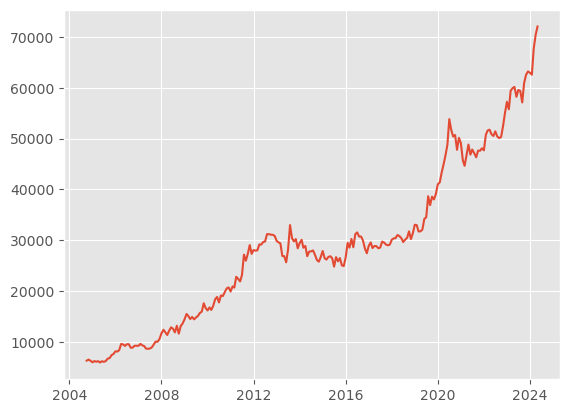

In [39]:
# EDA for data
plt.plot(df.Price)

(array([46., 26., 14., 87.,  9.,  6., 28.,  7., 10.,  3.]),
 array([ 5966. , 12574.4, 19182.8, 25791.2, 32399.6, 39008. , 45616.4,
        52224.8, 58833.2, 65441.6, 72050. ]),
 <BarContainer object of 10 artists>)

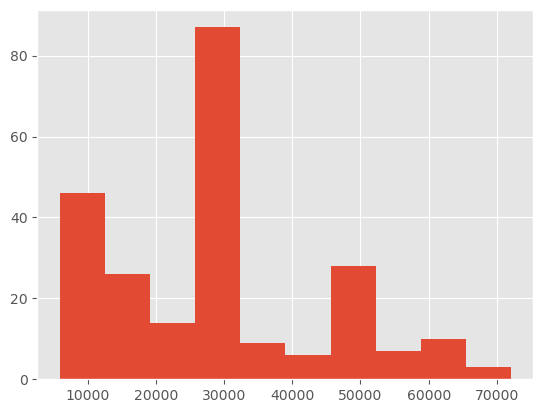

In [40]:
plt.hist(df.Price)

C:\Users\Harsh jaglan\AppData\Local\Temp\ipykernel_17944\315074570.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Price)
C:\Users\Harsh jaglan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Price', ylabel='Density'>

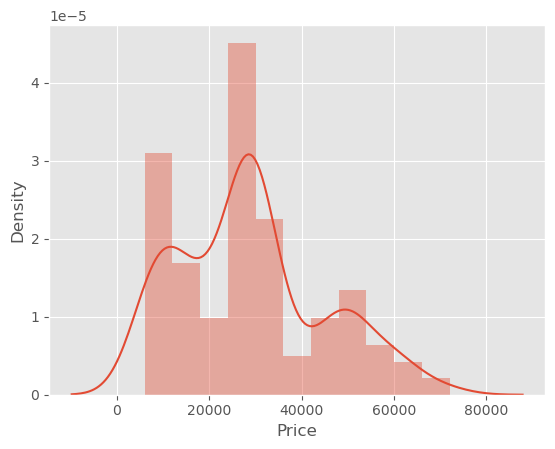

In [41]:
import seaborn as sns
sns.distplot(df.Price)

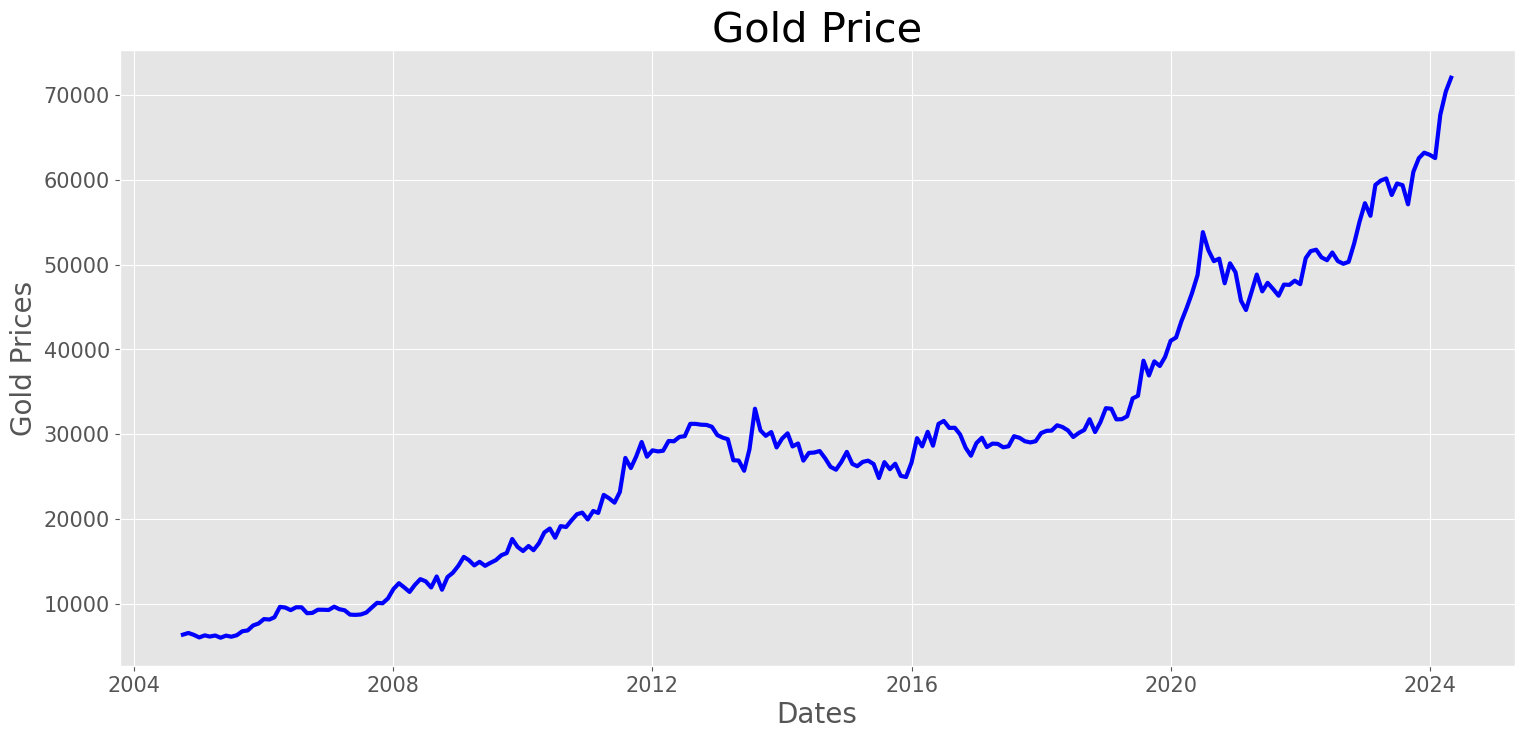

In [42]:
plt.style.use('ggplot')
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel('Dates', fontsize = 20)
plt.xticks(fontsize = 15)
plt.ylabel('Gold Prices', fontsize = 20)
plt.yticks(fontsize = 15)
plt.plot(df['Price'], linewidth = 3, color = 'blue')
plt.title('Gold Price', fontsize = 30)
plt.show()

In [49]:
rolmean=df["Price"].rolling(10).mean()

In [52]:
rolstd=df["Price"].rolling(10).std()

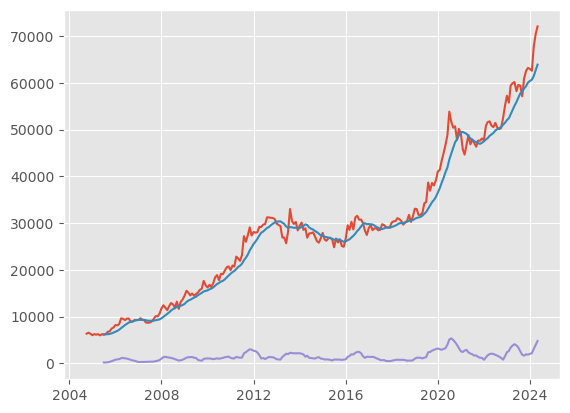

In [53]:
plt.plot(df.Price)
plt.plot(rolmean)
plt.plot(rolstd)

In [55]:
from statsmodels.tsa.stattools import adfuller
adful = adfuller(df.Price)

In [58]:
pd.Series(adful[0:4],index=["test stats","p-value","lag","data points"])

test stats       1.555402
p-value          0.997717
lag              0.000000
data points    235.000000
dtype: float64

In [69]:
# p value should be 0.05 other wise accept null-hypothysis (data is non stationary)
def test_stationarity(timeseries):
    # Determing rolling statistics
    rolmean = timeseries.rolling(15).mean() # rolling mean
    rolstd = timeseries.rolling(15).std() # rolling standard deviation
    # Plot rolling statistics:
    plt.figure(figsize = (18,8))
    plt.grid('both')
    plt.plot(timeseries, color='blue',label='Original', linewidth = 3)
    plt.plot(rolmean, color='red', label='Rolling Mean',linewidth = 3)
    plt.plot(rolstd, color='black', label = 'Rolling Std',linewidth = 4)
    plt.legend(loc='best', fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
    plt.title('Rolling Mean and Standard Deviation', fontsize = 25)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.show(block=False)

    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    # hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)


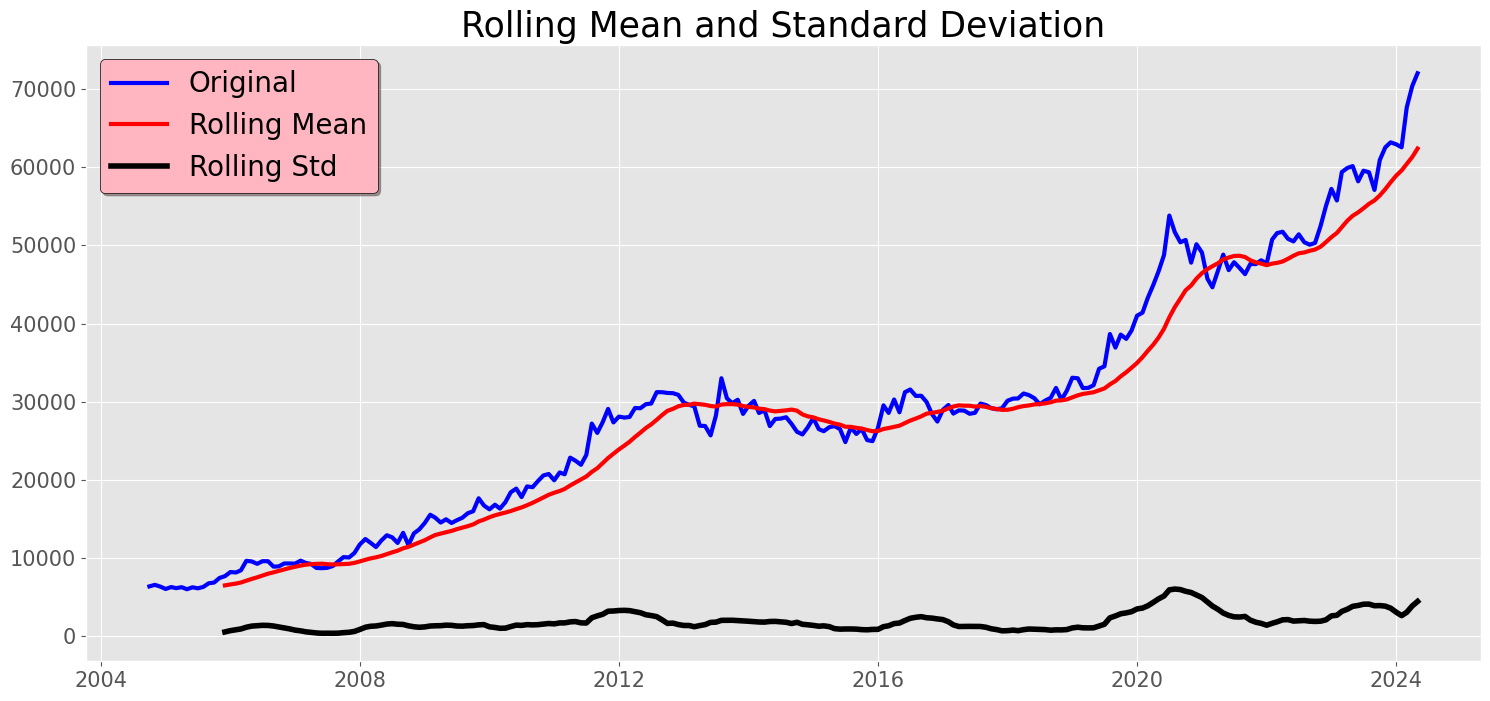

Results of dickey fuller test
Test Statistics                  1.555402
p-value                          0.997717
No. of lags used                 0.000000
Number of observations used    235.000000
critical value (1%)             -3.458487
critical value (5%)             -2.873919
critical value (10%)            -2.573367
dtype: float64


In [70]:
test_stationarity(df.Price)

C:\Users\Harsh jaglan\anaconda3\Lib\site-packages\seaborn\categorical.py:486: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if np.isscalar(data[0]):


<Axes: >

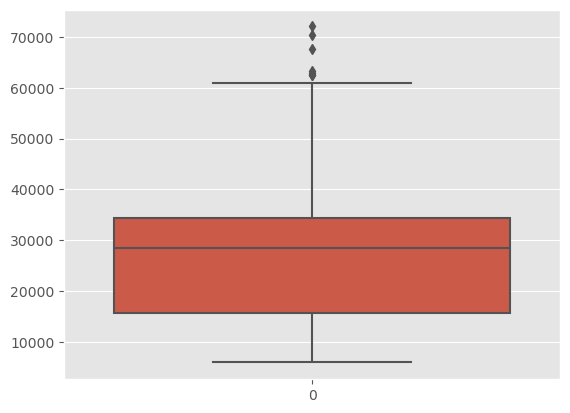

In [71]:
sns.boxplot(df.Price)

## Decomposition 

In [73]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df[["Price"]], period=12)

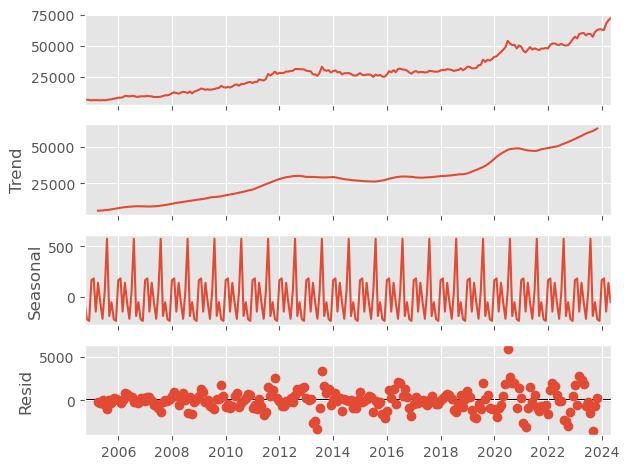

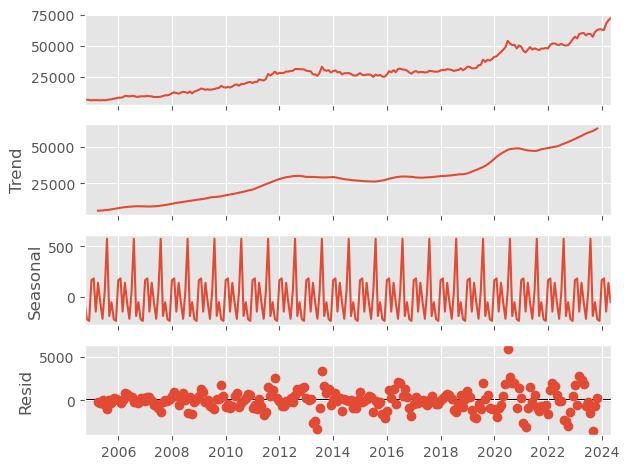

In [76]:
result.plot()

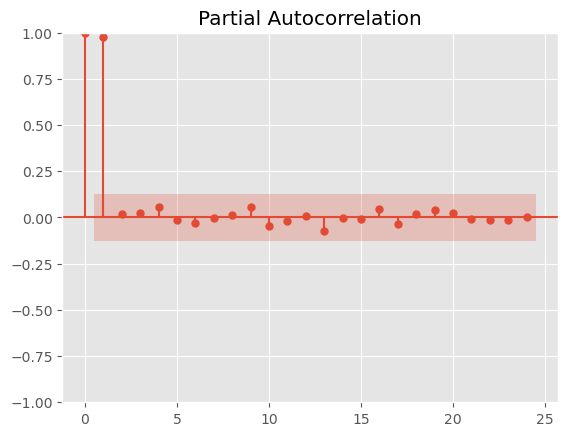

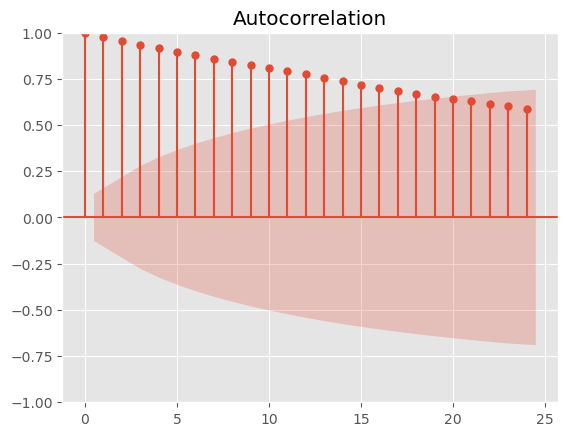

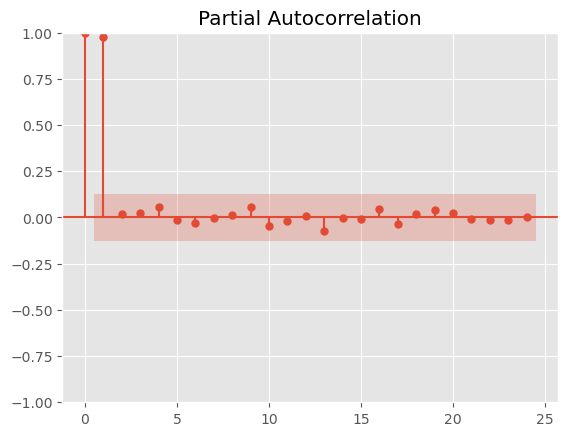

In [78]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(df.Price)
plot_pacf(df.Price)

# Preprocessing of the data

1. fill the miss
2. convert data into the stationary time series
3. if necessary then normalize the data
4. split it into train and test
5. clean the data by removing the outliers

## convert data into the stationary time series


In [80]:
df_gold = df["Price"]

In [87]:
df_gold = df_gold.diff()
df_gold = df_gold.dropna()

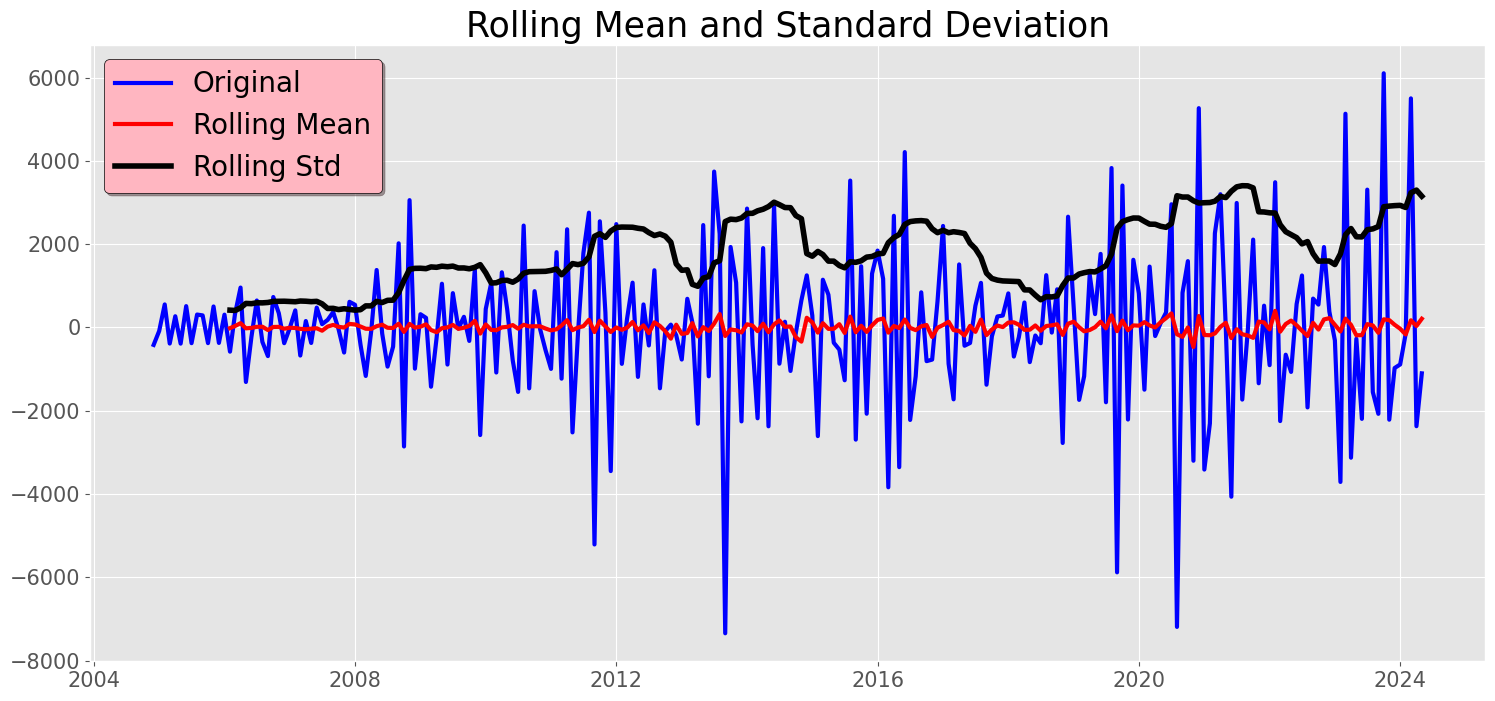

Results of dickey fuller test
Test Statistics               -8.989277e+00
p-value                        6.962749e-15
No. of lags used               1.000000e+01
Number of observations used    2.230000e+02
critical value (1%)           -3.460019e+00
critical value (5%)           -2.874590e+00
critical value (10%)          -2.573725e+00
dtype: float64


In [88]:
test_stationarity(df_gold)

In [99]:
train_data = df_gold[0:-30]

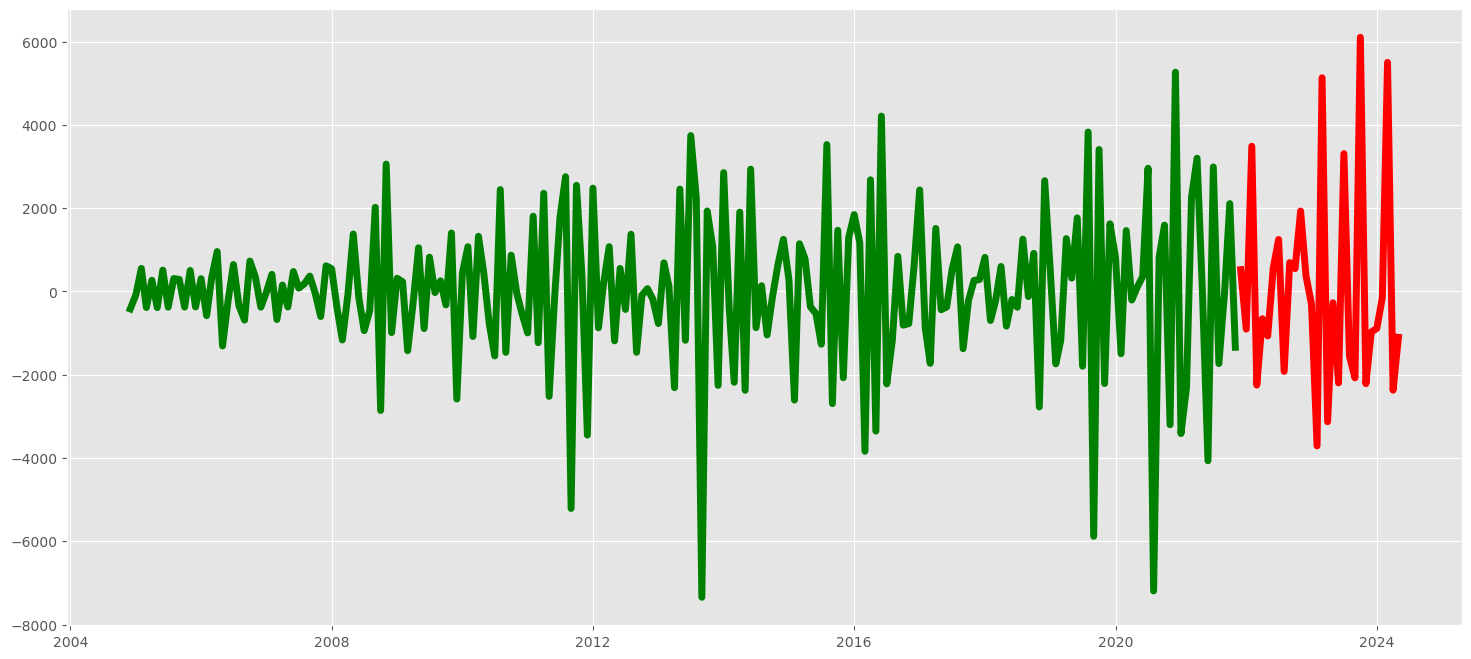

In [100]:
test_data = df_gold[-30:] 
plt.figure(figsize=(18,8))
plt.plot(train_data, 'green', label = 'train data', linewidth = 5)
plt.plot(test_data, 'red', label = 'test data', linewidth = 5)



# Model Building

In [95]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [96]:
df["Price"]

Date
2004-10-01     6329
2004-11-01     6528
2004-12-01     6307
2005-01-01     6000
2005-02-01     6245
              ...  
2024-01-01    62958
2024-02-01    62567
2024-03-01    67677
2024-04-01    70415
2024-05-01    72050
Name: Price, Length: 236, dtype: int64

In [102]:
history=[x for x in train_data]

In [103]:
model = ARIMA(history,order=(1,1,1))

In [104]:
model = model.fit()

In [105]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  204
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1779.989
Date:                Thu, 13 Jun 2024   AIC                           3565.979
Time:                        17:32:00   BIC                           3575.918
Sample:                             0   HQIC                          3570.000
                                - 204                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5439      0.045    -12.128      0.000      -0.632      -0.456
ma.L1         -1.0000      0.070    -14.327      0.000      -1.137      -0.863
sigma2      2.359e+06   2.96e-08   7.97e+13      0.000    2.36e+06    2.36e+06
===================================================================================
Ljung-Box (L1) (Q):                   9.94   Jarque-Bera (JB):                48.50
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               5.11   Skew:                            -0.52
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.42e+28. Standard errors may be unstable.
"""

In [108]:
model.forecast()[0]

731.5292909348645

In [111]:
test_data[0]

C:\Users\Harsh jaglan\AppData\Local\Temp\ipykernel_17944\2395562395.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  test_data[0]


522.0

In [114]:
mean_squared_error([test_data[0]],model.forecast())

C:\Users\Harsh jaglan\AppData\Local\Temp\ipykernel_17944\3878667994.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  mean_squared_error([test_data[0]],model.forecast())


43902.523759667114

In [115]:
np.sqrt(mean_squared_error([test_data[0]],model.forecast()))

C:\Users\Harsh jaglan\AppData\Local\Temp\ipykernel_17944\2013795996.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  np.sqrt(mean_squared_error([test_data[0]],model.forecast()))


209.52929093486455

In [117]:
def train_arima_model(X, y, arima_order):
    # prepare training dataset
    # make predictions list
    history = [x for x in X]
    predictions = list()
    for t in range(len(y)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(y[t])
    # calculate out of sample error
    rmse = np.sqrt(mean_squared_error(y, predictions))
    return rmse

In [125]:
def evaluate_models(dataset, test, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = train_arima_model(dataset, test, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))
        

In [126]:
# evaluate parameters
import warnings
warnings.filterwarnings('ignore')
p_values = range(0, 3)
d_values = range(0, 3)
q_values = range(0, 3)
evaluate_models(train_data, test_data, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=2479.917
ARIMA(0, 0, 1) RMSE=1796.896
ARIMA(0, 0, 2) RMSE=1821.276
ARIMA(0, 1, 0) RMSE=4254.293
ARIMA(0, 1, 1) RMSE=2479.895
ARIMA(0, 1, 2) RMSE=1795.922
ARIMA(0, 2, 0) RMSE=7778.195
ARIMA(0, 2, 1) RMSE=4263.850
ARIMA(0, 2, 2) RMSE=2496.806
ARIMA(1, 0, 0) RMSE=2190.593
ARIMA(1, 0, 1) RMSE=1820.921
ARIMA(1, 0, 2) RMSE=1824.167
ARIMA(1, 1, 0) RMSE=3226.804
ARIMA(1, 1, 1) RMSE=2191.278
ARIMA(1, 1, 2) RMSE=1820.801
ARIMA(1, 2, 0) RMSE=5000.598
ARIMA(1, 2, 1) RMSE=3233.822
ARIMA(1, 2, 2) RMSE=2207.529
ARIMA(2, 0, 0) RMSE=2057.626
ARIMA(2, 0, 1) RMSE=1826.257
ARIMA(2, 0, 2) RMSE=1823.680
ARIMA(2, 1, 0) RMSE=2910.524
ARIMA(2, 1, 1) RMSE=2058.868
ARIMA(2, 1, 2) RMSE=1814.113
ARIMA(2, 2, 0) RMSE=4321.259
ARIMA(2, 2, 1) RMSE=2917.401
ARIMA(2, 2, 2) RMSE=2102.563
Best ARIMA(0, 1, 2) RMSE=1795.922


In [128]:
history = [x for x in train_data]
predictions = list()
conf_list = list()
for t in range(len(test_data)):
    model = ARIMA(history,order=(0,1,2))
    model_fit = model.fit()
    fc = model_fit.forecast(alpha = 0.05)
    predictions.append(fc)
    history.append(test_data[t])
print('RMSE of ARIMA Model:', np.sqrt(mean_squared_error(test_data, predictions)))

RMSE of ARIMA Model: 1795.9223656185022


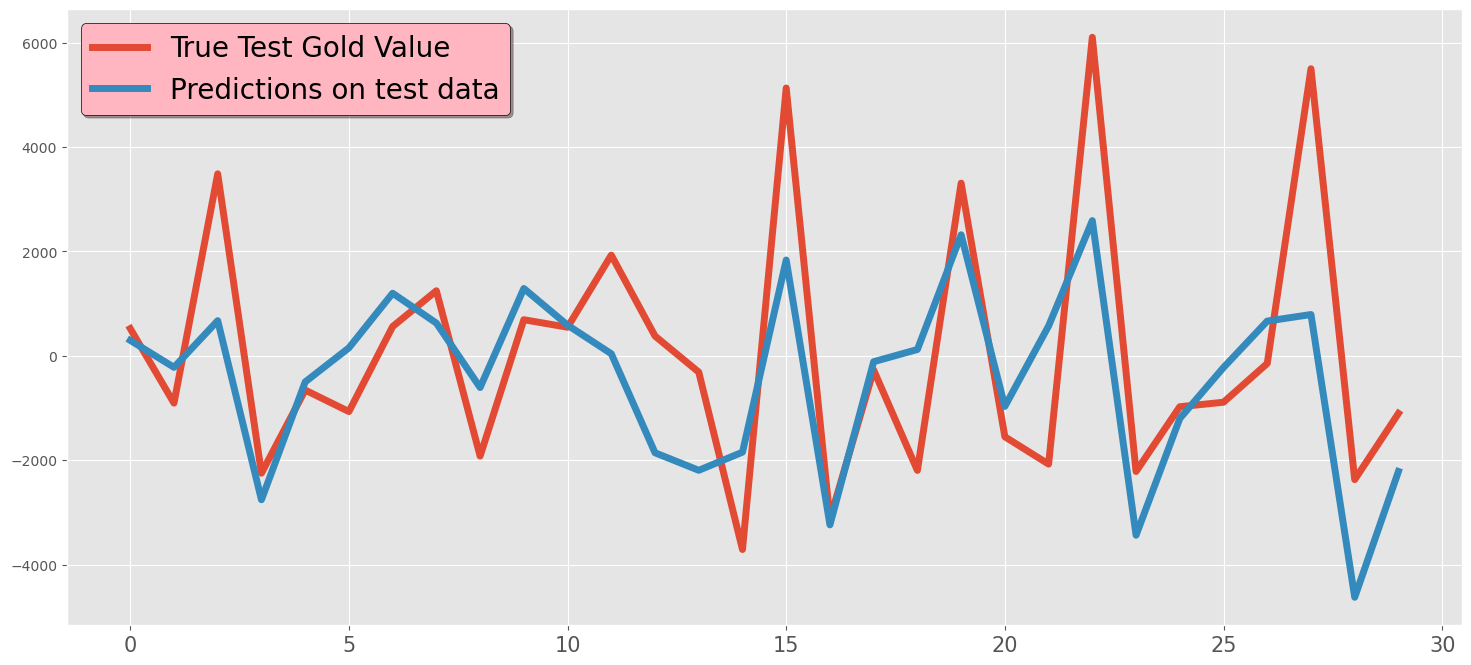

In [130]:
plt.figure(figsize=(18,8))
plt.grid(True)
plt.plot(range(len(test_data)),test_data, label = 'True Test Gold Value', linewidth = 5)
plt.plot(range(len(predictions)), predictions, label = 'Predictions on test data', linewidth = 5)
plt.xticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.legend(fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
plt.show()

In [131]:
fc_series = pd.Series(predictions, index=test_data.index)

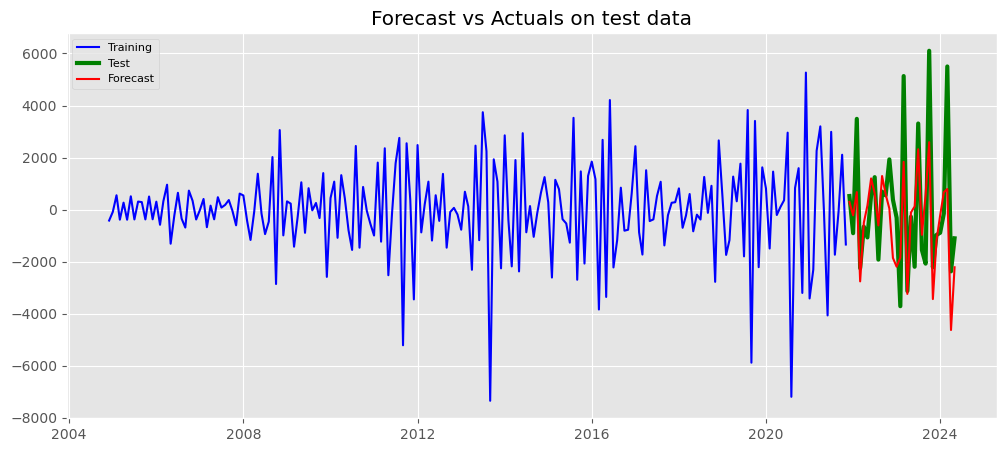

In [132]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data, label='Training', color = 'blue')
plt.plot(test_data, label='Test', color = 'green', linewidth = 3)
plt.plot(fc_series, label='Forecast', color = 'red')
plt.title('Forecast vs Actuals on test data')
plt.legend(loc='upper left', fontsize=8)
plt.show()

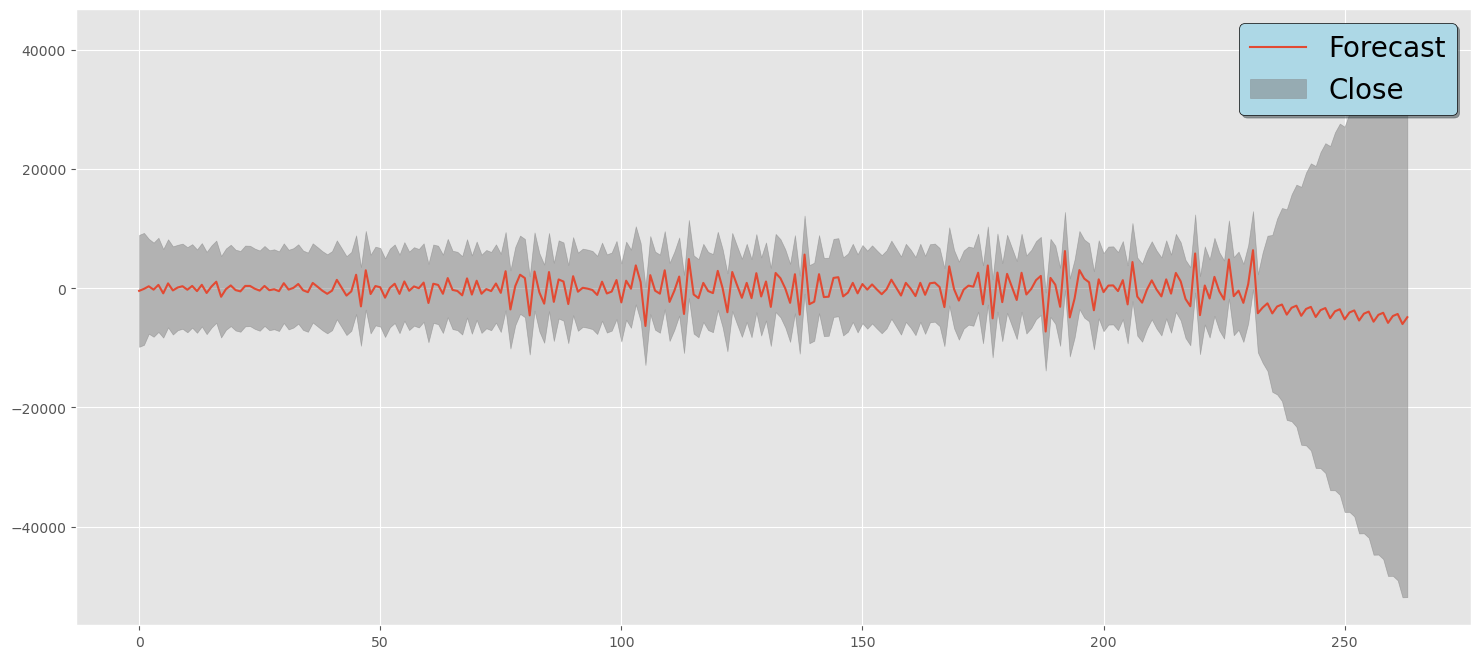

In [143]:
from statsmodels.graphics.tsaplots import plot_predict
fig = plt.figure(figsize=(18,8))
ax1 = fig.add_subplot(111)
plot_predict(result=model_fit,start=1, end=len(df_gold)+30, ax = ax1)
plt.grid("both")
plt.legend(['Forecast','Close','95% confidence interval'],fontsize = 20, shadow=True,facecolor='lightblue',edgecolor = 'k')
plt.show()

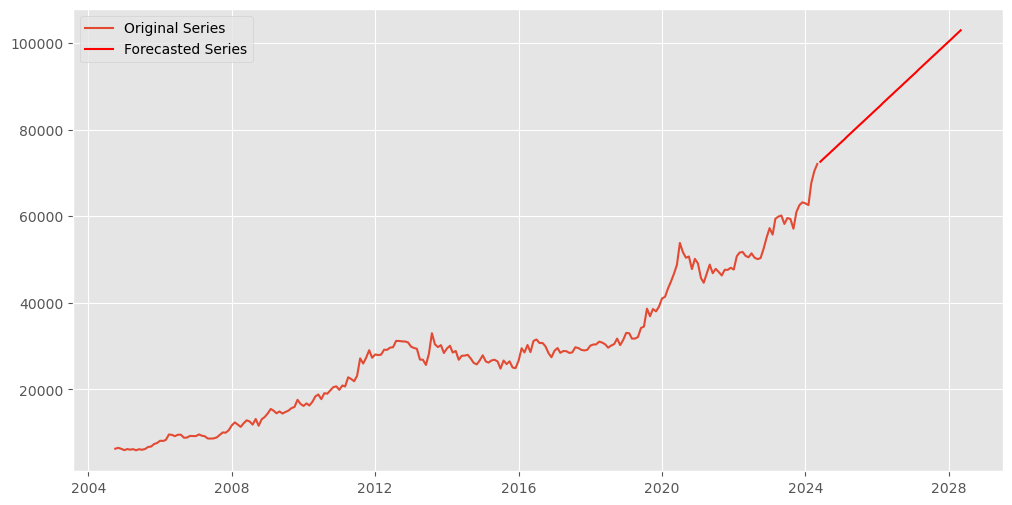

2024-06-01     72571.213084
2024-07-01     73216.853664
2024-08-01     73862.494244
2024-09-01     74508.134824
2024-10-01     75153.775403
2024-11-01     75799.415983
2024-12-01     76445.056563
2025-01-01     77090.697143
2025-02-01     77736.337723
2025-03-01     78381.978302
2025-04-01     79027.618882
2025-05-01     79673.259462
2025-06-01     80318.900042
2025-07-01     80964.540621
2025-08-01     81610.181201
2025-09-01     82255.821781
2025-10-01     82901.462361
2025-11-01     83547.102941
2025-12-01     84192.743520
2026-01-01     84838.384100
2026-02-01     85484.024680
2026-03-01     86129.665260
2026-04-01     86775.305840
2026-05-01     87420.946419
2026-06-01     88066.586999
2026-07-01     88712.227579
2026-08-01     89357.868159
2026-09-01     90003.508739
2026-10-01     90649.149318
2026-11-01     91294.789898
2026-12-01     91940.430478
2027-01-01     92586.071058
2027-02-01     93231.711638
2027-03-01     93877.352217
2027-04-01     94522.992797
2027-05-01     95168

In [168]:


# Differencing to make the series stationary
df_gold_diff = df_gold.diff().dropna()

# Fit ARIMA model (adjust order as needed)
model = ARIMA(df_gold_diff, order=(0,1,2))
fitted_model = model.fit()

# Forecast the differenced series
forecast_diff = fitted_model.forecast(steps=48)

# Reverse the differencing
forecast_original = forecast_diff.cumsum() + df_gold.iloc[-1]

# Plot the original and forecasted series
plt.figure(figsize=(12, 6))
plt.plot(df_gold, label='Original Series')
plt.plot(forecast_original, label='Forecasted Series', color='red')
plt.legend()
plt.show()

print(forecast_original)


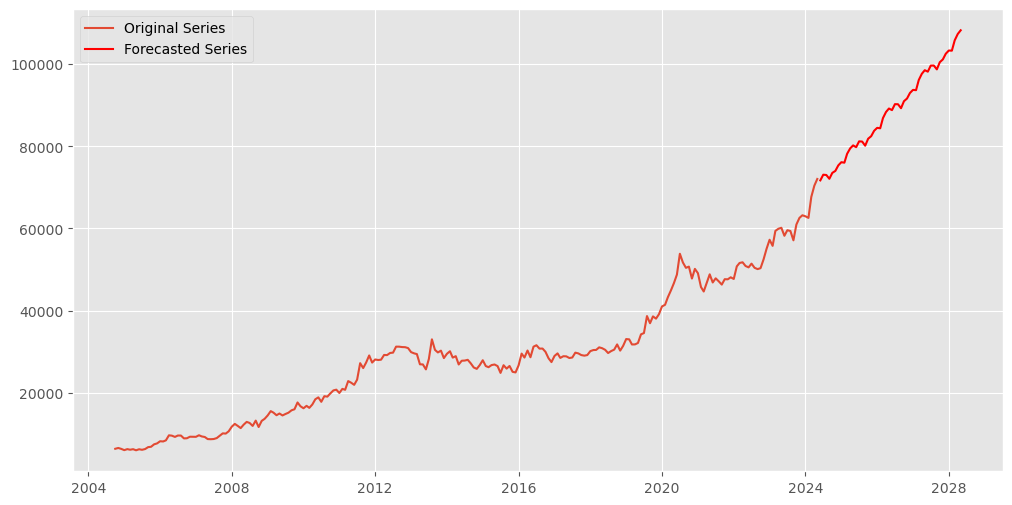

2024-06-01     71704.728784
2024-07-01     73085.799745
2024-08-01     73015.872702
2024-09-01     72093.203378
2024-10-01     73528.031922
2024-11-01     74007.463381
2024-12-01     75354.366704
2025-01-01     76129.779378
2025-02-01     76015.909755
2025-03-01     78180.946413
2025-04-01     79496.124214
2025-05-01     80225.132132
2025-06-01     79794.415307
2025-07-01     81207.603254
2025-08-01     81161.557173
2025-09-01     80147.433530
2025-10-01     81844.200344
2025-11-01     82466.662941
2025-12-01     83782.805227
2026-01-01     84497.507619
2026-02-01     84393.038227
2026-03-01     86871.400889
2026-04-01     88356.327888
2026-05-01     89206.334718
2026-06-01     88819.218305
2026-07-01     90264.917508
2026-08-01     90252.159549
2026-09-01     89282.203093
2026-10-01     90989.803142
2026-11-01     91634.314956
2026-12-01     92988.899501
2027-01-01     93744.869132
2027-02-01     93675.053766
2027-03-01     96159.402487
2027-04-01     97663.858507
2027-05-01     98537

In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load data and preprocess
file_path = "Gold price (INR).xlsx"
df = pd.read_excel(file_path)
df = df.set_index("Date")
df = df.sort_values(by=['Date'], ascending=True)
df_gold = df["Price"]

# Differencing to make the series stationary
df_gold_diff = df_gold.diff().dropna()

# Fit SARIMA model (adjust order and seasonal_order as needed)
model = SARIMAX(df_gold_diff, order=(1,1,1), seasonal_order=(1,1,1,12))
fitted_model = model.fit()

# Forecast the differenced series
forecast_diff = fitted_model.forecast(steps=48)

# Reverse the differencing
forecast_original = forecast_diff.cumsum() + df_gold.iloc[-1]

# Plot the original and forecasted series
plt.figure(figsize=(12, 6))
plt.plot(df_gold, label='Original Series')
plt.plot(forecast_original, label='Forecasted Series', color='red')
plt.legend()
plt.show()

print(forecast_original)


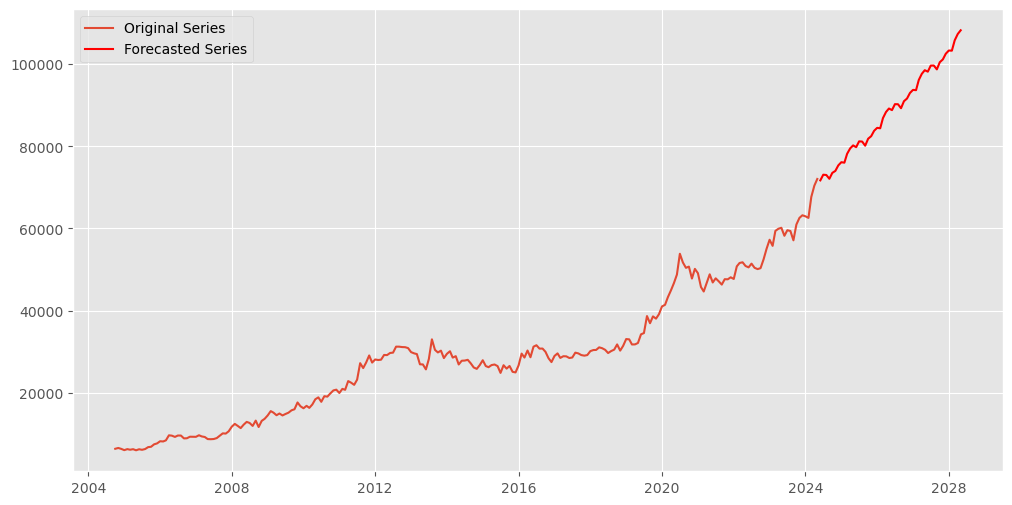

2024-06-01     71704.728784
2024-07-01     73085.799745
2024-08-01     73015.872702
2024-09-01     72093.203378
2024-10-01     73528.031922
2024-11-01     74007.463381
2024-12-01     75354.366704
2025-01-01     76129.779378
2025-02-01     76015.909755
2025-03-01     78180.946413
2025-04-01     79496.124214
2025-05-01     80225.132132
2025-06-01     79794.415307
2025-07-01     81207.603254
2025-08-01     81161.557173
2025-09-01     80147.433530
2025-10-01     81844.200344
2025-11-01     82466.662941
2025-12-01     83782.805227
2026-01-01     84497.507619
2026-02-01     84393.038227
2026-03-01     86871.400889
2026-04-01     88356.327888
2026-05-01     89206.334718
2026-06-01     88819.218305
2026-07-01     90264.917508
2026-08-01     90252.159549
2026-09-01     89282.203093
2026-10-01     90989.803142
2026-11-01     91634.314956
2026-12-01     92988.899501
2027-01-01     93744.869132
2027-02-01     93675.053766
2027-03-01     96159.402487
2027-04-01     97663.858507
2027-05-01     98537

In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load data and preprocess
file_path = "Gold price (INR).xlsx"
df = pd.read_excel(file_path)
df = df.set_index("Date")
df = df.sort_values(by=['Date'], ascending=True)
df_gold = df["Price"]

# Differencing to make the series stationary
df_gold_diff = df_gold.diff().dropna()

# Fit SARIMAX model (adjust order and seasonal_order as needed)
model = SARIMAX(df_gold_diff, order=(1,1,1), seasonal_order=(1,1,1,12))
fitted_model = model.fit()

# Forecast the differenced series
forecast_diff = fitted_model.forecast(steps=48)

# Reverse the differencing
forecast_original = forecast_diff.cumsum() + df_gold.iloc[-1]

# Plot the original and forecasted series
plt.figure(figsize=(12, 6))
plt.plot(df_gold, label='Original Series')
plt.plot(forecast_original, label='Forecasted Series', color='red')
plt.legend()
plt.show()

print(forecast_original)
